In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib import colors
from scipy import stats

# --------------- IMPORTING THE DATA --------------- #

# Evacuation Data
evacdata = pd.read_csv('./gy-evac pop-table.csv', skiprows=6).sort_values(by=['initial-people', 'ticks']).reset_index(drop=True)
# renaming the column to something that isn't cursed
evacdata.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata.rename(columns={'initial-people': 'population'}, inplace=True)
evacdata.columns = evacdata.columns.str.replace('-', '_')
# calculate time in minutes
evacdata['time_minutes'] = evacdata['ticks'] * evacdata['tick_time_in_mins']

# other evavuation data
evacdata2 = pd.read_csv('../3d/1000/gy-evac 3d-table.csv', skiprows=6).sort_values(by=['initial-people', 'ticks']).reset_index(drop=True)
evacdata2 = evacdata2[evacdata2['evacuation-probability'] ==0.3]
# renaming the column to something that isn't cursed
evacdata2.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata2.rename(columns={'initial-people': 'population'}, inplace=True)
evacdata2.columns = evacdata2.columns.str.replace('-', '_')
# calculate time in minutes
evacdata2['time_minutes'] = evacdata2['ticks'] * evacdata2['tick_time_in_mins']

# 5000 evavuation data
evacdata3 = pd.read_csv('../3d/5000/gy-evac 3d-table.csv', skiprows=6).sort_values(by=['initial-people', 'ticks']).reset_index(drop=True)
evacdata3 = evacdata3[evacdata3['initial-people'] ==5000]
# renaming the column to something that isn't cursed
evacdata3.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata3.rename(columns={'initial-people': 'population'}, inplace=True)
evacdata3.columns = evacdata3.columns.str.replace('-', '_')
# calculate time in minutes
evacdata3['time_minutes'] = evacdata3['ticks'] * evacdata3['tick_time_in_mins']

# Journey Time Data
journey_metrics = pd.read_csv('./jm__p1000_evp0.3_tick0.3_max_walk_d1_term_d0.3_interval30.csv').sort_values(by=['start_tick']).reset_index(drop=True)
# calculate time in minutes
journey_metrics['start_time_minutes'] = journey_metrics['start_tick'] * 0.3 # 0.3 minutes per tick

# calculate normalised journey time
journey_metrics['normalised_journey_time'] = journey_metrics['actual_time'] / journey_metrics['ideal_time']

# calculate the mean normalised journey time every 30 minutes for each run
# Bin the start_tick at intervals of 120 (corresponding to 30 minutes)
journey_metrics['start_time_bin'] = pd.cut(journey_metrics['start_time_minutes'], bins=np.arange(-15, journey_metrics['start_tick'].max() + 45, 30))
# Calculate the mean normalised journey time for each bin
mean_normalised_journey_time_per_bin = journey_metrics.groupby('start_time_bin')['normalised_journey_time'].mean().reset_index()
# Calculate the mean normalised journey time for each bin for each run
mean_normalised_journey_time_per_bin_per_run = journey_metrics.groupby(['start_time_bin'])['normalised_journey_time'].mean().reset_index()

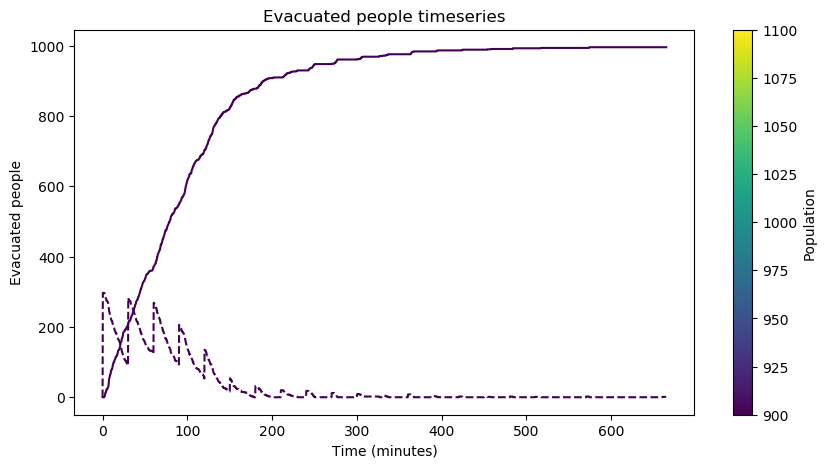

In [7]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(colors.to_rgb(c1))
    c2=np.array(colors.to_rgb(c2))
    return colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' 
c2='gray'
n = len(list(evacdata['population'].unique()))

# Plot each run
for i, ticktime in enumerate(evacdata['population'].unique()):
    run_data = evacdata[evacdata['population'] == ticktime]
    color = plt.cm.viridis(i / n)  # Use the jet colormap
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuated'], color=color)
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuating'], linestyle='--', color=color)

# Update colorbar to use the jet colormap
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=evacdata['population'].min(), vmax=evacdata['population'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population')

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::2], labels[::2])
ax.set_title('Evacuated people timeseries')
ax.set_ylabel('Evacuated people')
ax.set_xlabel('Time (minutes)')
#ax.set_xlim(0, 4000)

plt.show()

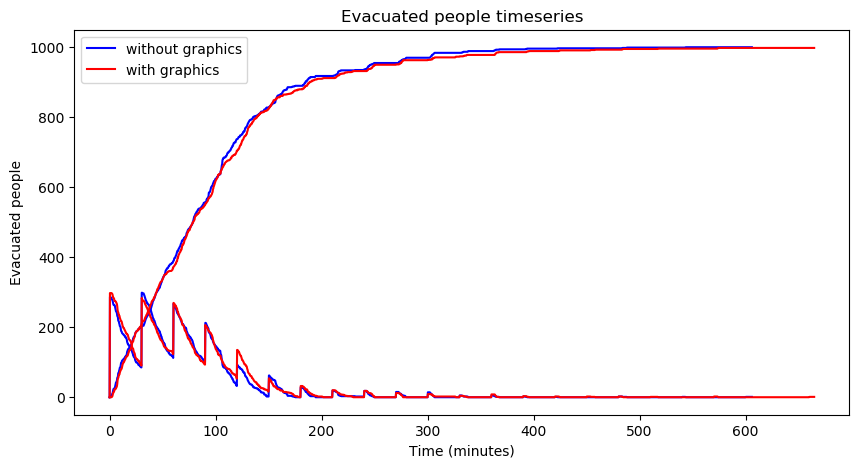

In [17]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(colors.to_rgb(c1))
    c2=np.array(colors.to_rgb(c2))
    return colors.to_hex((1-mix)*c1 + mix*c2)

plt.plot(evacdata2['time_minutes'], evacdata2['get_no_evacuated'], label='without graphics', color='b')
plt.plot(evacdata2['time_minutes'], evacdata2['get_no_evacuating'], color='b')
plt.plot(evacdata['time_minutes'], evacdata['get_no_evacuated'], label='with graphics', color='r')
plt.plot(evacdata['time_minutes'], evacdata['get_no_evacuating'], color='r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::2], labels[::2])
ax.set_title('Evacuated people timeseries')
ax.set_ylabel('Evacuated people')
ax.set_xlabel('Time (minutes)')
#ax.set_xlim(0, 4000)

plt.show()